In [81]:
import shap
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers


In [125]:
feature_columns = [ 'Sample', 'Position', 'Date', 'Volume of aeration tanks (m3)', 'Actual Inf rate (m3/d)', '℃ Temp.Max.SamplingDate', '℃ Temp.Avg.SamplingDate', '℃ Temp.Min.SamplingDate', '℃ Dew.Max.SamplingDate',
 '℃ Dew.Avg.SamplingDate', '℃ Dew.Min.SamplingDate', '℃ Humidity.Max.SamplingDate', '℃ Humidity.Min.SamplingDate', '℃ Wind.Max.SamplingDate', '℃ Wind.Min.SamplingDate',
 '℃ Pressure.Max.SamplingDate', '℃ Pressure.Min.SamplingDate', '℃ Precipitation.SamplingDate', '℃ Temp.Max.WeekMean', '℃ Temp.Avg.WeekMean', '℃ Temp.Min.WeekMean',
 '℃ Dew.Max.WeekMean', '℃ Dew.Avg.WeekMean', '℃ Dew.Min.WeekMean', '℃ Humidity.Max.WeekMean', '℃ Humidity.Min.WeekMean', '℃ Wind.Max.WeekMean', '℃ Wind.Min.WeekMean',
 '℃ Pressure.Max.WeekMean', '℃ Pressure.Min.WeekMean', '℃ Precipitation.WeekMean', '℃ Temp.Max.WeekMax', '℃ Temp.Avg.WeekMax', '℃ Temp.Min.WeekMax', '℃ Dew.Max.WeekMax',
 '℃ Dew.Avg.WeekMax', '℃ Dew.Min.WeekMax', '℃ Humidity.Max.WeekMax', '℃ Humidity.Min.WeekMax', '℃ Wind.Max.WeekMax', '℃ Wind.Min.WeekMax', '℃ Pressure.Max.WeekMax',
 '℃ Pressure.Min.WeekMax', '℃ Precipitation.WeekMax', '℃ Precipitation.WeekAccum', '℃ Precipitation.MonthAccum', '℃ Ambient temperature (℃)', 
'COD (mg/l) In', 'COD (mg/l) Out', 'BOD7 (mg/l) In', 'BOD7 (mg/l) Out', 'NH3 (mg/L) In', 'NH3 (mg/L) Out', 'Total Nitrogen (mg/L) In', 'Total Nitrogen (mg/L) Out',
 'Total Phosphorus (mg/L) In', 'Total Phosphorus (mg/L) Out', 'pH AS', 'DO (mg/L) AS', 'Temp (oC) AS', 'MLSS (mg/l) AS', 'MLVSS (mg/l) AS', 'SVI (ml/g) AS', 'SRT (days)', 'Precip (inch)',
 'Recycle ratio (total return sludge flow/total influent flow)', 'Calcium (mg/L)', 'Magnesium (mg/L)', 'Potassium (mg/L)', 'Iron (mg/L)', 'Manganese (mg/L)', 'Aluminium (mg/L)',
 'Zinc (mg/L)', 'Lead (mg/L)', 'Copper (mg/L)', 'Arsenic (mg/L)', 'Cadmium (mg/L)', 'Sulphur (mg/L)', 'Sillicon (mg/L)', 'Nickel (mg/L)', 'Chromium (mg/L)', 'Q* (%)',
 'COD Removal Rate (mg/L/h)', 'COD Removal Efficiency (%)', 'COD_influent_rate (g/l/h)', 'efficiency', ]
target_column = [ 'performance_class']

In [126]:
original_df = pd.read_csv("../0. Data/classification_data.csv")
original_df = original_df.drop(columns=["Recycle ratio (total return sludge flow/total influent flow).1"])
original_df.columns.to_list()

['Sample',
 'Position',
 'Country',
 'City',
 'Plant',
 'Date',
 'Volume of aeration tanks (m3)',
 'Actual Inf rate (m3/d)',
 '℃ Temp.Max.SamplingDate',
 '℃ Temp.Avg.SamplingDate',
 '℃ Temp.Min.SamplingDate',
 '℃ Dew.Max.SamplingDate',
 '℃ Dew.Avg.SamplingDate',
 '℃ Dew.Min.SamplingDate',
 '℃ Humidity.Max.SamplingDate',
 '℃ Humidity.Min.SamplingDate',
 '℃ Wind.Max.SamplingDate',
 '℃ Wind.Min.SamplingDate',
 '℃ Pressure.Max.SamplingDate',
 '℃ Pressure.Min.SamplingDate',
 '℃ Precipitation.SamplingDate',
 '℃ Temp.Max.WeekMean',
 '℃ Temp.Avg.WeekMean',
 '℃ Temp.Min.WeekMean',
 '℃ Dew.Max.WeekMean',
 '℃ Dew.Avg.WeekMean',
 '℃ Dew.Min.WeekMean',
 '℃ Humidity.Max.WeekMean',
 '℃ Humidity.Min.WeekMean',
 '℃ Wind.Max.WeekMean',
 '℃ Wind.Min.WeekMean',
 '℃ Pressure.Max.WeekMean',
 '℃ Pressure.Min.WeekMean',
 '℃ Precipitation.WeekMean',
 '℃ Temp.Max.WeekMax',
 '℃ Temp.Avg.WeekMax',
 '℃ Temp.Min.WeekMax',
 '℃ Dew.Max.WeekMax',
 '℃ Dew.Avg.WeekMax',
 '℃ Dew.Min.WeekMax',
 '℃ Humidity.Max.WeekMax',
 

In [127]:
as_list = [
    'NewcastleAS', 'VarbergAS', 'SFAS',
    'Beijing3AS', 'Beijing2AS', 'GuangzhouAS',
    'KnoxvilleASP1', 'KnoxvilleASP2', 'KnoxvilleASP3',
    'DurbanASP1', 'DurbanASP2', 'DurbanASP3', 'DurbanASP4',
    'LisbonAS', 'ChicagoAS',
    'NormanASP1', 'NormanASP2', 'NormanASP3'
]

original_df = original_df[original_df["Position"].isin(as_list)]
original_df


,Sample,Position,Country,City,Plant,Date,Volume of aeration tanks (m3),Actual Inf rate (m3/d),℃ Temp.Max.SamplingDate,℃ Temp.Avg.SamplingDate,...,Sillicon (mg/L),Nickel (mg/L),Chromium (mg/L),Mercury (mg/L),Q* (%),COD Removal Rate (mg/L/h),COD Removal Efficiency (%),COD_influent_rate (g/l/h),efficiency,performance_class
0,UK01A,NewcastleAS,United Kindom,Newcastle,UKTM1A,2015-01-28,3600.0,17254.0,6.67,3.33,...,0.047071,0.00818473,0.00186585,NaN,479.277778,24.363287,52.813853,46.130486,0.528139,Low
1,UK02A,NewcastleAS,United Kindom,Newcastle,UKTM1A,2015-02-04,3600.0,7007.0,5.56,3.33,...,0.648063,0.0074807,0,NaN,194.638889,15.652211,63.486842,24.654259,0.634868,Low
2,UK03A,NewcastleAS,United Kindom,Newcastle,UKTM1A,2015-02-11,3600.0,7197.0,5.56,4.44,...,0.166629,0.00364224,0.00256111,NaN,199.916667,6.164097,38.743455,15.910035,0.387435,Low
3,UK04A,NewcastleAS,United Kindom,Newcastle,UKTM1A,2015-02-18,3600.0,6126.0,11.67,10.00,...,0.128797,0.0155561,0.00184347,NaN,170.166667,7.161181,46.759259,15.315000,0.467593,Low
4,UK05A,NewcastleAS,United Kindom,Newcastle,UKTM1A,2015-02-25,3600.0,6898.0,10.56,7.78,...,0.060467,0.00577474,0.00162337,NaN,191.611111,7.744282,46.634615,16.606296,0.466346,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,N48C,NormanASP3,United States,Norman,USNO2,2015-12-23,9751.2,31922.0,20.56,9.44,...,NaN,NaN,NaN,NaN,327.364837,37.510554,88.709677,42.284625,0.887097,Medium
1195,N49C,NormanASP3,United States,Norman,USNO2,2015-12-30,9751.2,45538.0,0.56,-2.22,...,NaN,NaN,NaN,NaN,466.998933,14.593717,75.000000,19.458289,0.750000,Low
1196,N50C,NormanASP3,United States,Norman,USNO2,2016-01-06,9751.2,39274.0,11.67,8.33,...,NaN,NaN,NaN,NaN,402.760686,43.632408,86.666667,50.345086,0.866667,Medium
1197,N51C,NormanASP3,United States,Norman,USNO2,2016-01-13,9751.2,34284.0,14.44,5.56,...,NaN,NaN,NaN,NaN,351.587497,48.636270,92.222222,52.738125,0.922222,High


In [129]:
original_df = original_df[feature_columns]
original_df

,Sample,Position,Date,Volume of aeration tanks (m3),Actual Inf rate (m3/d),℃ Temp.Max.SamplingDate,℃ Temp.Avg.SamplingDate,℃ Temp.Min.SamplingDate,℃ Dew.Max.SamplingDate,℃ Dew.Avg.SamplingDate,...,Cadmium (mg/L),Sulphur (mg/L),Sillicon (mg/L),Nickel (mg/L),Chromium (mg/L),Q* (%),COD Removal Rate (mg/L/h),COD Removal Efficiency (%),COD_influent_rate (g/l/h),efficiency
0,UK01A,NewcastleAS,2015-01-28,3600.0,17254.0,6.67,3.33,0.56,36,32,...,0.000289229,25.6924,0.047071,0.00818473,0.00186585,479.277778,24.363287,52.813853,46.130486,0.528139
1,UK02A,NewcastleAS,2015-02-04,3600.0,7007.0,5.56,3.33,0.56,34,31,...,0.000435155,26.1562,0.648063,0.0074807,0,194.638889,15.652211,63.486842,24.654259,0.634868
2,UK03A,NewcastleAS,2015-02-11,3600.0,7197.0,5.56,4.44,2.78,37,35,...,0.000257982,25.9403,0.166629,0.00364224,0.00256111,199.916667,6.164097,38.743455,15.910035,0.387435
3,UK04A,NewcastleAS,2015-02-18,3600.0,6126.0,11.67,10.00,8.89,46,45,...,0.000283569,27.6539,0.128797,0.0155561,0.00184347,170.166667,7.161181,46.759259,15.315000,0.467593
4,UK05A,NewcastleAS,2015-02-25,3600.0,6898.0,10.56,7.78,5.56,50,45,...,0.000440212,26.1561,0.060467,0.00577474,0.00162337,191.611111,7.744282,46.634615,16.606296,0.466346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,N48C,NormanASP3,2015-12-23,9751.2,31922.0,20.56,9.44,-1.67,49,38,...,NaN,NaN,NaN,NaN,NaN,327.364837,37.510554,88.709677,42.284625,0.887097
1195,N49C,NormanASP3,2015-12-30,9751.2,45538.0,0.56,-2.22,-5.56,29,26,...,NaN,NaN,NaN,NaN,NaN,466.998933,14.593717,75.000000,19.458289,0.750000
1196,N50C,NormanASP3,2016-01-06,9751.2,39274.0,11.67,8.33,4.44,47,43,...,NaN,NaN,NaN,NaN,NaN,402.760686,43.632408,86.666667,50.345086,0.866667
1197,N51C,NormanASP3,2016-01-13,9751.2,34284.0,14.44,5.56,-3.33,29,24,...,NaN,NaN,NaN,NaN,NaN,351.587497,48.636270,92.222222,52.738125,0.922222


In [130]:
X_svd_df = pd.read_csv("../0. Data/ESV_SVD_25D.csv", index_col=0)
X_svd_df

,SVD_1,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,SVD_9,SVD_10,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
UK01A,119.512586,30.206870,257.892781,244.542209,1476.170952,-886.607324,877.460751,-748.717582,-459.228337,-222.319253,...,359.310911,-89.069847,35.938781,-80.955725,74.555696,204.643887,-44.432424,-75.566567,-28.152542,-139.776911
UK02A,184.855875,44.575649,394.888152,340.562363,2222.852732,-1271.239892,1316.628486,-1090.680760,-736.107534,-323.143894,...,590.358520,-68.025554,-130.805420,-132.906720,124.226026,291.279505,-43.424642,-21.048832,-121.881068,-222.789861
UK03A,176.093600,47.116199,391.320514,351.139450,2224.944927,-1291.757728,1319.204476,-1115.554144,-725.117653,-331.408948,...,573.401686,-61.099369,-127.653732,-125.362428,118.647594,264.290790,-21.878628,-38.734378,-73.757111,-183.435814
UK04A,188.055920,45.143048,405.899105,335.812563,2275.728090,-1367.835375,1378.402861,-1152.497381,-787.089174,-359.224185,...,598.514885,-104.100813,-251.199593,-164.765123,188.262919,316.618341,-25.531131,10.909645,-205.971329,-358.286225
UK05A,183.131358,45.603622,414.252648,326.158036,2297.905647,-1415.437251,1424.057599,-1168.939447,-812.225139,-382.059660,...,649.802823,-171.539529,-265.680254,-160.743738,161.550729,365.633693,-83.970978,-1.510278,-207.412524,-486.803164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GZ101,494.238896,-38.824252,31.679222,121.701359,359.688041,-1.272138,50.041731,354.381228,781.470751,212.451309,...,-112.166328,58.385814,102.919704,72.808057,-94.706035,-13.287829,140.859177,199.582808,72.440998,-135.446180
GZ102,305.125160,42.983298,41.087944,183.634098,399.361700,15.441426,74.218017,416.102790,817.795276,118.619032,...,-79.298511,51.476070,23.173439,75.400952,-81.106475,-41.925868,50.742185,150.559234,90.515057,-98.718260
GZ103,189.396822,91.082964,48.823397,181.868279,492.019812,38.842927,82.219243,506.441452,1299.410536,137.176615,...,-100.969706,23.984718,-30.219658,158.638139,-247.486326,36.096102,117.122560,71.440781,237.915310,-110.151610
GZ104,156.687353,127.642448,46.379917,193.862037,501.665470,40.127084,70.643125,529.404743,1460.791904,158.691635,...,-103.062245,-62.725783,-0.736163,183.274059,-249.849197,1.157861,190.774279,53.071887,324.480931,-144.010866


In [131]:

original_df_indexed = original_df.set_index("Sample")

# X_svd_df와 병합
merged_df = original_df_indexed.join(X_svd_df, how="inner")

# 결과 확인
print(merged_df.shape)
merged_df


(813, 110)


,Position,Date,Volume of aeration tanks (m3),Actual Inf rate (m3/d),℃ Temp.Max.SamplingDate,℃ Temp.Avg.SamplingDate,℃ Temp.Min.SamplingDate,℃ Dew.Max.SamplingDate,℃ Dew.Avg.SamplingDate,℃ Dew.Min.SamplingDate,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
UK01A,NewcastleAS,2015-01-28,3600.0,17254.0,6.67,3.33,0.56,36,32,30,...,359.310911,-89.069847,35.938781,-80.955725,74.555696,204.643887,-44.432424,-75.566567,-28.152542,-139.776911
UK02A,NewcastleAS,2015-02-04,3600.0,7007.0,5.56,3.33,0.56,34,31,27,...,590.358520,-68.025554,-130.805420,-132.906720,124.226026,291.279505,-43.424642,-21.048832,-121.881068,-222.789861
UK03A,NewcastleAS,2015-02-11,3600.0,7197.0,5.56,4.44,2.78,37,35,34,...,573.401686,-61.099369,-127.653732,-125.362428,118.647594,264.290790,-21.878628,-38.734378,-73.757111,-183.435814
UK04A,NewcastleAS,2015-02-18,3600.0,6126.0,11.67,10.00,8.89,46,45,45,...,598.514885,-104.100813,-251.199593,-164.765123,188.262919,316.618341,-25.531131,10.909645,-205.971329,-358.286225
UK05A,NewcastleAS,2015-02-25,3600.0,6898.0,10.56,7.78,5.56,50,45,41,...,649.802823,-171.539529,-265.680254,-160.743738,161.550729,365.633693,-83.970978,-1.510278,-207.412524,-486.803164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N48C,NormanASP3,2015-12-23,9751.2,31922.0,20.56,9.44,-1.67,49,38,28,...,79.002384,-127.434802,376.146945,19.078335,-74.248669,103.338832,-214.610152,-190.040699,242.680544,205.719815
N49C,NormanASP3,2015-12-30,9751.2,45538.0,0.56,-2.22,-5.56,29,26,21,...,16.530354,-34.585756,301.029151,29.531855,43.658539,-140.688473,100.361306,230.568493,-241.501097,-234.927432
N50C,NormanASP3,2016-01-06,9751.2,39274.0,11.67,8.33,4.44,47,43,38,...,-78.089860,-222.846491,431.170700,38.761832,-266.749614,451.700897,-581.428367,-649.538278,782.778535,448.260753
N51C,NormanASP3,2016-01-13,9751.2,34284.0,14.44,5.56,-3.33,29,24,17,...,-178.605008,-386.187801,824.720211,23.364556,-232.236579,570.914432,-596.004992,-930.312088,916.910955,438.088537


In [ ]:
# merged_df = merged_df.apply(pd.to_numeric, errors='coerce')
# merged_df = merged_df.fillna(merged_df.mean(numeric_only=True))

# merged_df

,Volume of aeration tanks (m3),Actual Inf rate (m3/d),℃ Temp.Max.SamplingDate,℃ Temp.Avg.SamplingDate,℃ Temp.Min.SamplingDate,℃ Dew.Max.SamplingDate,℃ Dew.Avg.SamplingDate,℃ Dew.Min.SamplingDate,℃ Humidity.Max.SamplingDate,℃ Humidity.Min.SamplingDate,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
UK01A,3600.0,17254.0,6.67,3.33,0.56,36,32,30,93,70,...,359.310911,-89.069847,35.938781,-80.955725,74.555696,204.643887,-44.432424,-75.566567,-28.152542,-139.776911
UK02A,3600.0,7007.0,5.56,3.33,0.56,34,31,27,81,65,...,590.358520,-68.025554,-130.805420,-132.906720,124.226026,291.279505,-43.424642,-21.048832,-121.881068,-222.789861
UK03A,3600.0,7197.0,5.56,4.44,2.78,37,35,34,87,76,...,573.401686,-61.099369,-127.653732,-125.362428,118.647594,264.290790,-21.878628,-38.734378,-73.757111,-183.435814
UK04A,3600.0,6126.0,11.67,10.00,8.89,46,45,45,87,76,...,598.514885,-104.100813,-251.199593,-164.765123,188.262919,316.618341,-25.531131,10.909645,-205.971329,-358.286225
UK05A,3600.0,6898.0,10.56,7.78,5.56,50,45,41,94,82,...,649.802823,-171.539529,-265.680254,-160.743738,161.550729,365.633693,-83.970978,-1.510278,-207.412524,-486.803164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N48C,9751.2,31922.0,20.56,9.44,-1.67,49,38,28,100,28,...,79.002384,-127.434802,376.146945,19.078335,-74.248669,103.338832,-214.610152,-190.040699,242.680544,205.719815
N49C,9751.2,45538.0,0.56,-2.22,-5.56,29,26,21,100,85,...,16.530354,-34.585756,301.029151,29.531855,43.658539,-140.688473,100.361306,230.568493,-241.501097,-234.927432
N50C,9751.2,39274.0,11.67,8.33,4.44,47,43,38,100,71,...,-78.089860,-222.846491,431.170700,38.761832,-266.749614,451.700897,-581.428367,-649.538278,782.778535,448.260753
N51C,9751.2,34284.0,14.44,5.56,-3.33,29,24,17,92,21,...,-178.605008,-386.187801,824.720211,23.364556,-232.236579,570.914432,-596.004992,-930.312088,916.910955,438.088537


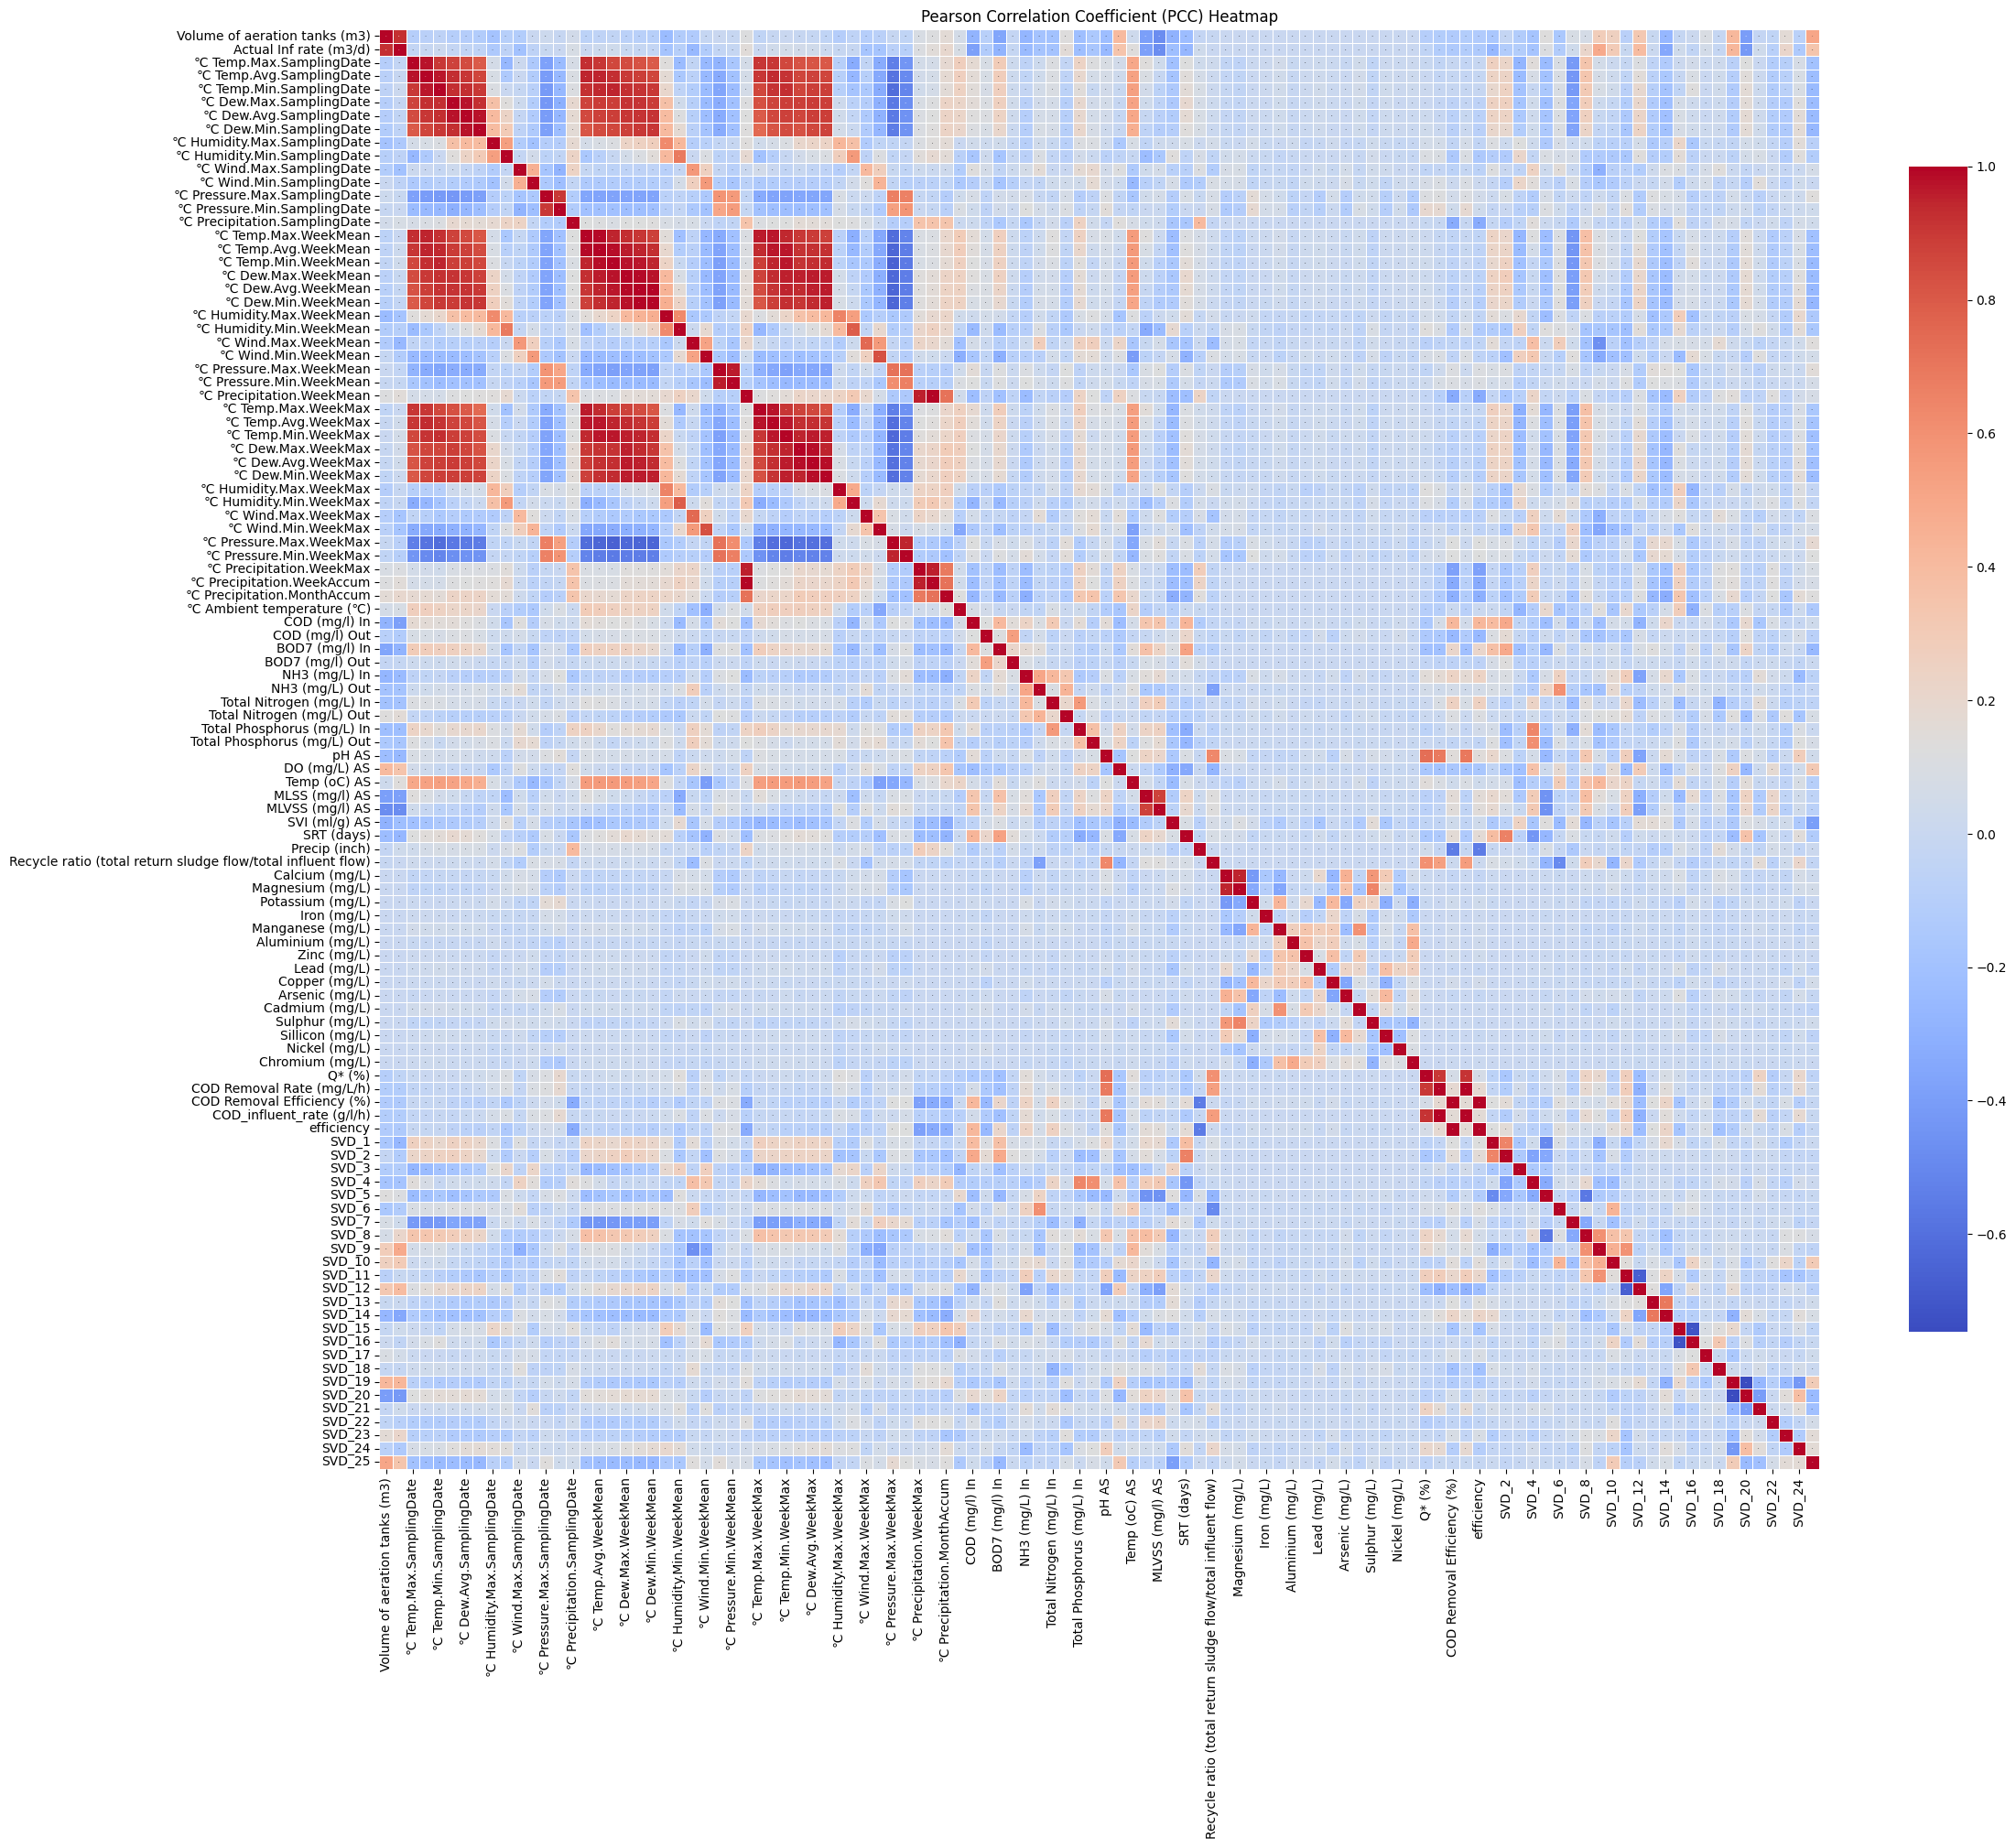

In [103]:
# 🔹 상관계수 행렬 계산 (PCC)
corr_matrix = merged_df.corr(method='pearson')

# 🔹 히트맵 시각화
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5, annot_kws={"size": 0})
plt.title("Pearson Correlation Coefficient (PCC) Heatmap")
plt.tight_layout()
plt.show()

In [132]:
merged_df

,Position,Date,Volume of aeration tanks (m3),Actual Inf rate (m3/d),℃ Temp.Max.SamplingDate,℃ Temp.Avg.SamplingDate,℃ Temp.Min.SamplingDate,℃ Dew.Max.SamplingDate,℃ Dew.Avg.SamplingDate,℃ Dew.Min.SamplingDate,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
UK01A,NewcastleAS,2015-01-28,3600.0,17254.0,6.67,3.33,0.56,36,32,30,...,359.310911,-89.069847,35.938781,-80.955725,74.555696,204.643887,-44.432424,-75.566567,-28.152542,-139.776911
UK02A,NewcastleAS,2015-02-04,3600.0,7007.0,5.56,3.33,0.56,34,31,27,...,590.358520,-68.025554,-130.805420,-132.906720,124.226026,291.279505,-43.424642,-21.048832,-121.881068,-222.789861
UK03A,NewcastleAS,2015-02-11,3600.0,7197.0,5.56,4.44,2.78,37,35,34,...,573.401686,-61.099369,-127.653732,-125.362428,118.647594,264.290790,-21.878628,-38.734378,-73.757111,-183.435814
UK04A,NewcastleAS,2015-02-18,3600.0,6126.0,11.67,10.00,8.89,46,45,45,...,598.514885,-104.100813,-251.199593,-164.765123,188.262919,316.618341,-25.531131,10.909645,-205.971329,-358.286225
UK05A,NewcastleAS,2015-02-25,3600.0,6898.0,10.56,7.78,5.56,50,45,41,...,649.802823,-171.539529,-265.680254,-160.743738,161.550729,365.633693,-83.970978,-1.510278,-207.412524,-486.803164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N48C,NormanASP3,2015-12-23,9751.2,31922.0,20.56,9.44,-1.67,49,38,28,...,79.002384,-127.434802,376.146945,19.078335,-74.248669,103.338832,-214.610152,-190.040699,242.680544,205.719815
N49C,NormanASP3,2015-12-30,9751.2,45538.0,0.56,-2.22,-5.56,29,26,21,...,16.530354,-34.585756,301.029151,29.531855,43.658539,-140.688473,100.361306,230.568493,-241.501097,-234.927432
N50C,NormanASP3,2016-01-06,9751.2,39274.0,11.67,8.33,4.44,47,43,38,...,-78.089860,-222.846491,431.170700,38.761832,-266.749614,451.700897,-581.428367,-649.538278,782.778535,448.260753
N51C,NormanASP3,2016-01-13,9751.2,34284.0,14.44,5.56,-3.33,29,24,17,...,-178.605008,-386.187801,824.720211,23.364556,-232.236579,570.914432,-596.004992,-930.312088,916.910955,438.088537


In [104]:
# 예측 대상 (SVD_로 시작하는 컬럼들)
target_columns = [col for col in merged_df.columns if col.startswith("SVD_")]

# 전체 피처 중에서 SVD가 아닌 컬럼들만 입력값으로 사용
feature_columns = [col for col in merged_df.columns if col not in target_columns]

X = merged_df[feature_columns]

y = merged_df[target_columns]

In [ ]:
merged_df.index.values

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'

In [170]:
sample_name_list

['BJ143',
 'BJ144',
 'BJ145',
 'BJ146',
 'BJ147',
 'BJ148',
 'BJ149',
 'BJ150',
 'BJ151',
 'BJ152',
 'BJ153',
 'BJ154',
 'BJ155',
 'BJ156',
 'BJ157',
 'BJ158',
 'BJ159',
 'BJ160',
 'BJ161',
 'BJ162',
 'BJ163',
 'BJ164',
 'BJ165',
 'BJ166',
 'BJ167',
 'BJ168',
 'BJ169',
 'BJ170',
 'BJ171',
 'BJ172',
 'BJ173',
 'BJ174',
 'BJ175',
 'BJ176',
 'BJ177',
 'BJ178',
 'BJ179',
 'BJ180',
 'BJ181',
 'BJ182',
 'BJ183',
 'BJ184',
 'BJ185',
 'BJ186',
 'BJ187',
 'BJ188',
 'BJ189',
 'BJ190',
 'BJ191',
 'BJ192',
 'BJ92',
 'BJ93',
 'BJ94',
 'BJ95',
 'BJ96',
 'BJ97',
 'BJ98',
 'BJ99',
 'BJ100',
 'BJ101',
 'BJ102',
 'BJ103',
 'BJ104',
 'BJ105',
 'BJ106',
 'BJ107',
 'BJ108',
 'BJ109',
 'BJ110',
 'BJ111',
 'BJ112',
 'BJ113',
 'BJ114',
 'BJ115',
 'BJ116',
 'BJ117',
 'BJ118',
 'BJ119',
 'BJ120',
 'BJ121',
 'BJ122',
 'BJ123',
 'BJ124',
 'BJ125',
 'BJ126',
 'BJ127',
 'BJ128',
 'BJ129',
 'BJ130',
 'BJ131',
 'BJ132',
 'BJ133',
 'BJ134',
 'BJ135',
 'BJ136',
 'BJ137',
 'BJ138',
 'BJ139',
 'BJ140',
 'BJ141',
 'Ch02',

In [ ]:

# 컬럼 구분
svd_cols = [col for col in merged_df.columns if col.startswith("SVD_")]
feature_cols = [col for col in merged_df.columns if col not in svd_cols]


X_list = []
y_list = []
sample_name_list = []

for plant, group_df in merged_df.groupby("Position"):
    group_df = group_df.sort_values("Date")  # ✅ reset_index(drop=True) 제거!

    for i in range(1, len(group_df)):
        current_feat = group_df.iloc[i][feature_cols]
        prev_svd = group_df.iloc[i-1][svd_cols]
        x_combined = pd.concat([current_feat, prev_svd])

        y_target = group_df.iloc[i][svd_cols]

        X_list.append(x_combined)
        y_list.append(y_target)

        sample_name = group_df.index[i]  # ✅ 원래 merged_df의 인덱스 (샘플명)
        sample_name_list.append(sample_name)


# 최종 데이터프레임
X_combined_df = pd.DataFrame(X_list, index=sample_name_list)
y_combined_df = pd.DataFrame(y_list, index=sample_name_list)




ValueError: could not convert string to float: 'Beijing2AS'

In [146]:
X_combined_df = X_combined_df.apply(pd.to_numeric, errors='coerce')
X_combined_df = X_combined_df.fillna(X_combined_df.mean(numeric_only=True))
X_combined_df.drop(columns=["Position", "Date"], inplace=True)
X_combined_df

KeyError: "['Position', 'Date'] not found in axis"

In [148]:
y_combined_df

,SVD_1,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,SVD_9,SVD_10,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
1,197.861517,199.171854,590.135366,602.967195,524.796398,-194.890628,-9.094217,436.458155,1362.450845,191.806973,...,357.989381,-114.635319,143.832754,-54.885662,230.474448,-121.564897,153.277615,-198.259944,262.437334,52.576113
2,207.214739,198.423624,629.774414,635.066077,511.878159,-197.354386,27.766139,406.328228,1282.147176,174.090136,...,357.476862,-129.928063,160.825619,-43.535394,216.018449,-133.473281,163.458531,-187.295112,248.708429,59.054799
3,186.229879,184.268077,393.076568,581.631214,472.111863,-152.815100,13.070893,425.555819,1257.183328,179.420584,...,386.954296,-126.885360,97.207702,-55.850495,264.337338,-173.612984,282.539729,-203.614000,276.573825,49.609553
4,193.447980,198.304327,364.654770,604.412742,469.661964,-155.270357,-2.048848,459.800877,1322.215086,200.741196,...,456.104859,-147.219208,71.138638,-62.215277,309.750748,-247.679430,405.571888,-197.015934,217.469822,48.169274
5,195.440943,206.935522,375.325914,611.794209,519.073135,-202.165997,-50.938835,465.666909,1384.683576,214.011501,...,514.368115,-188.075150,78.648404,-91.881297,428.205830,-322.166861,461.506961,-218.769547,262.434092,50.690017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,255.911058,345.259863,4849.941687,-98.156443,301.694917,-175.393631,215.386154,-141.361521,-173.699032,20.162268,...,72.775052,61.545496,-144.816352,38.065391,-80.951101,-70.711340,1.462919,89.558499,-60.681735,78.185890
48,387.613244,343.175858,5189.934846,-151.317394,199.622201,-129.309272,172.327600,-11.447637,-173.102902,88.113673,...,105.205005,11.365890,-105.264552,40.491902,-104.518769,-12.286845,-41.277604,38.447368,15.859208,38.447044
49,283.204042,328.886538,4691.180965,-96.004254,316.160104,-179.103647,216.888479,-106.426562,-142.352750,42.482270,...,48.375391,42.507659,-151.507612,50.336191,-97.122063,-74.901177,2.571859,71.857578,-11.479346,35.150844
50,238.166145,278.825004,3654.924968,-6.498779,607.562307,-301.409278,355.899776,-139.313829,-194.548226,151.348307,...,52.075103,53.544726,-190.475772,83.143223,-140.936503,-141.663976,3.691948,119.803711,-11.651670,56.887692


In [149]:
# 🔹 3. Split the data into training and test sets (70:30 split with random seed 1004)
X_combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)
y_combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)
X_combined_df.fillna(X_combined_df.mean(), inplace=True)
y_combined_df.fillna(y_combined_df.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X_combined_df, y_combined_df, test_size=0.3, random_state=1004)

# 🔹 4. Normalize feature values using standard scaling (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("NaNs in X_train:", np.isnan(X_train_scaled).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("Infs in X_train:", np.isinf(X_train_scaled).sum())
print("Infs in y_train:", np.isinf(y_train).sum())


NaNs in X_train: 0
NaNs in y_train: SVD_1     0
SVD_2     0
SVD_3     0
SVD_4     0
SVD_5     0
SVD_6     0
SVD_7     0
SVD_8     0
SVD_9     0
SVD_10    0
SVD_11    0
SVD_12    0
SVD_13    0
SVD_14    0
SVD_15    0
SVD_16    0
SVD_17    0
SVD_18    0
SVD_19    0
SVD_20    0
SVD_21    0
SVD_22    0
SVD_23    0
SVD_24    0
SVD_25    0
dtype: int64
Infs in X_train: 0
Infs in y_train: SVD_1     0
SVD_2     0
SVD_3     0
SVD_4     0
SVD_5     0
SVD_6     0
SVD_7     0
SVD_8     0
SVD_9     0
SVD_10    0
SVD_11    0
SVD_12    0
SVD_13    0
SVD_14    0
SVD_15    0
SVD_16    0
SVD_17    0
SVD_18    0
SVD_19    0
SVD_20    0
SVD_21    0
SVD_22    0
SVD_23    0
SVD_24    0
SVD_25    0
dtype: int64


In [153]:
# 🔹 5. Build a 3-layer deep neural network (MLP) for regression
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(25)  # Output layer without activation for regression
])

# 🔹 6. Compile the model using Mean Squared Error loss and Adam optimizer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 🔹 7. Train the model with validation on the test set
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    verbose=1)



Epoch 1/100


/Users/k23070952/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99977824.0000 - mae: 3529.6833 - val_loss: 3920355.0000 - val_mae: 1007.0762
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2187943.7500 - mae: 747.8576 - val_loss: 619331.5000 - val_mae: 452.2203
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 638912.7500 - mae: 448.2448 - val_loss: 516355.0938 - val_mae: 414.2701
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 542984.5625 - mae: 416.8081 - val_loss: 463768.2812 - val_mae: 391.4940
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 542948.3750 - mae: 400.6963 - val_loss: 427879.9688 - val_mae: 368.2350
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 480670.0625 - mae: 374.2012 - val_loss: 398644.6875 - val_mae: 346.4056
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 470111.4375 - mae: 363.3091 - val_loss: 371335.1562 - val_mae: 332.7708
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 453726.1562 - mae: 356.8603 - 

In [154]:
# 🔹 8. Prediction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


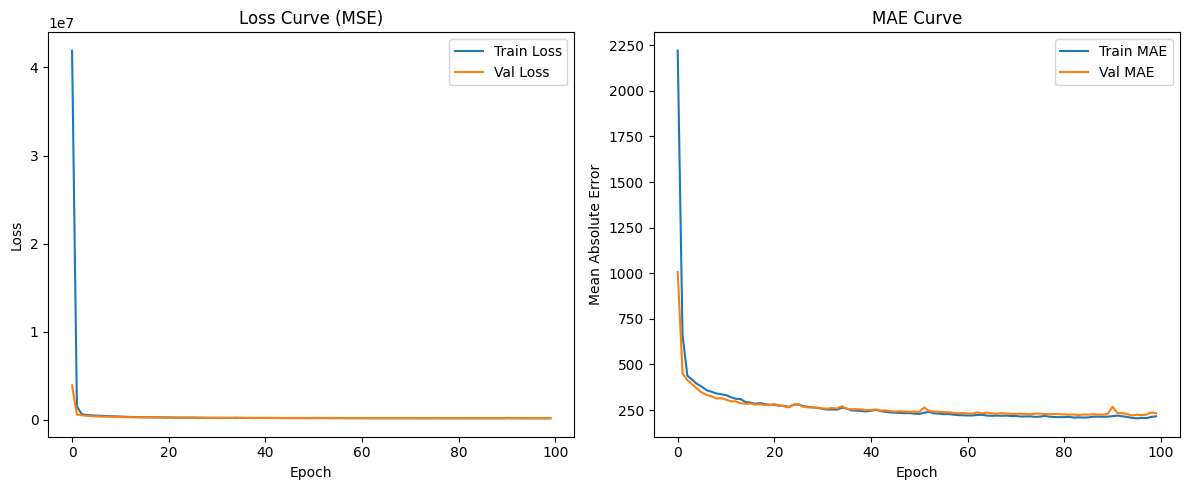

In [155]:
# 🔹 9. Plot training and validation loss/MAE over epochs
plt.figure(figsize=(12, 5))

# Plot MSE loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()



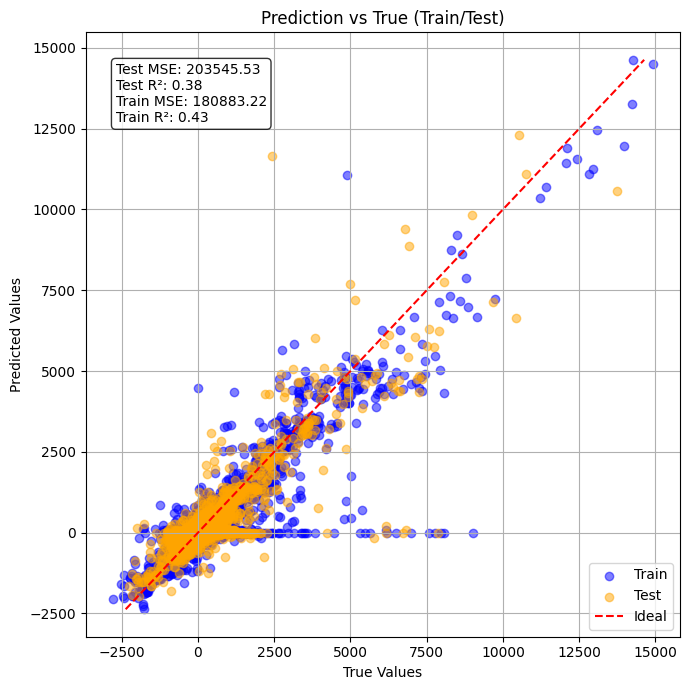

In [156]:
plt.figure(figsize=(7, 7))

# Train set (파란색)
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Train', color='blue')

# Test set (주황색)
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Test', color='orange')

# Diagonal (예측 = 실제)
min_val = min(y.min().values[0], y_train_pred.min(), y_test_pred.min())
max_val = max(y.max().values[0], y_train_pred.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal')

# Label, title, legend
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs True (Train/Test)")
plt.legend()
plt.grid(True)

# 🔹 성능 지표 텍스트 삽입
textstr = f"""Test MSE: {mse_test:.2f}
Test R²: {r2_test:.2f}
Train MSE: {mse_train:.2f}
Train R²: {r2_train:.2f}"""
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

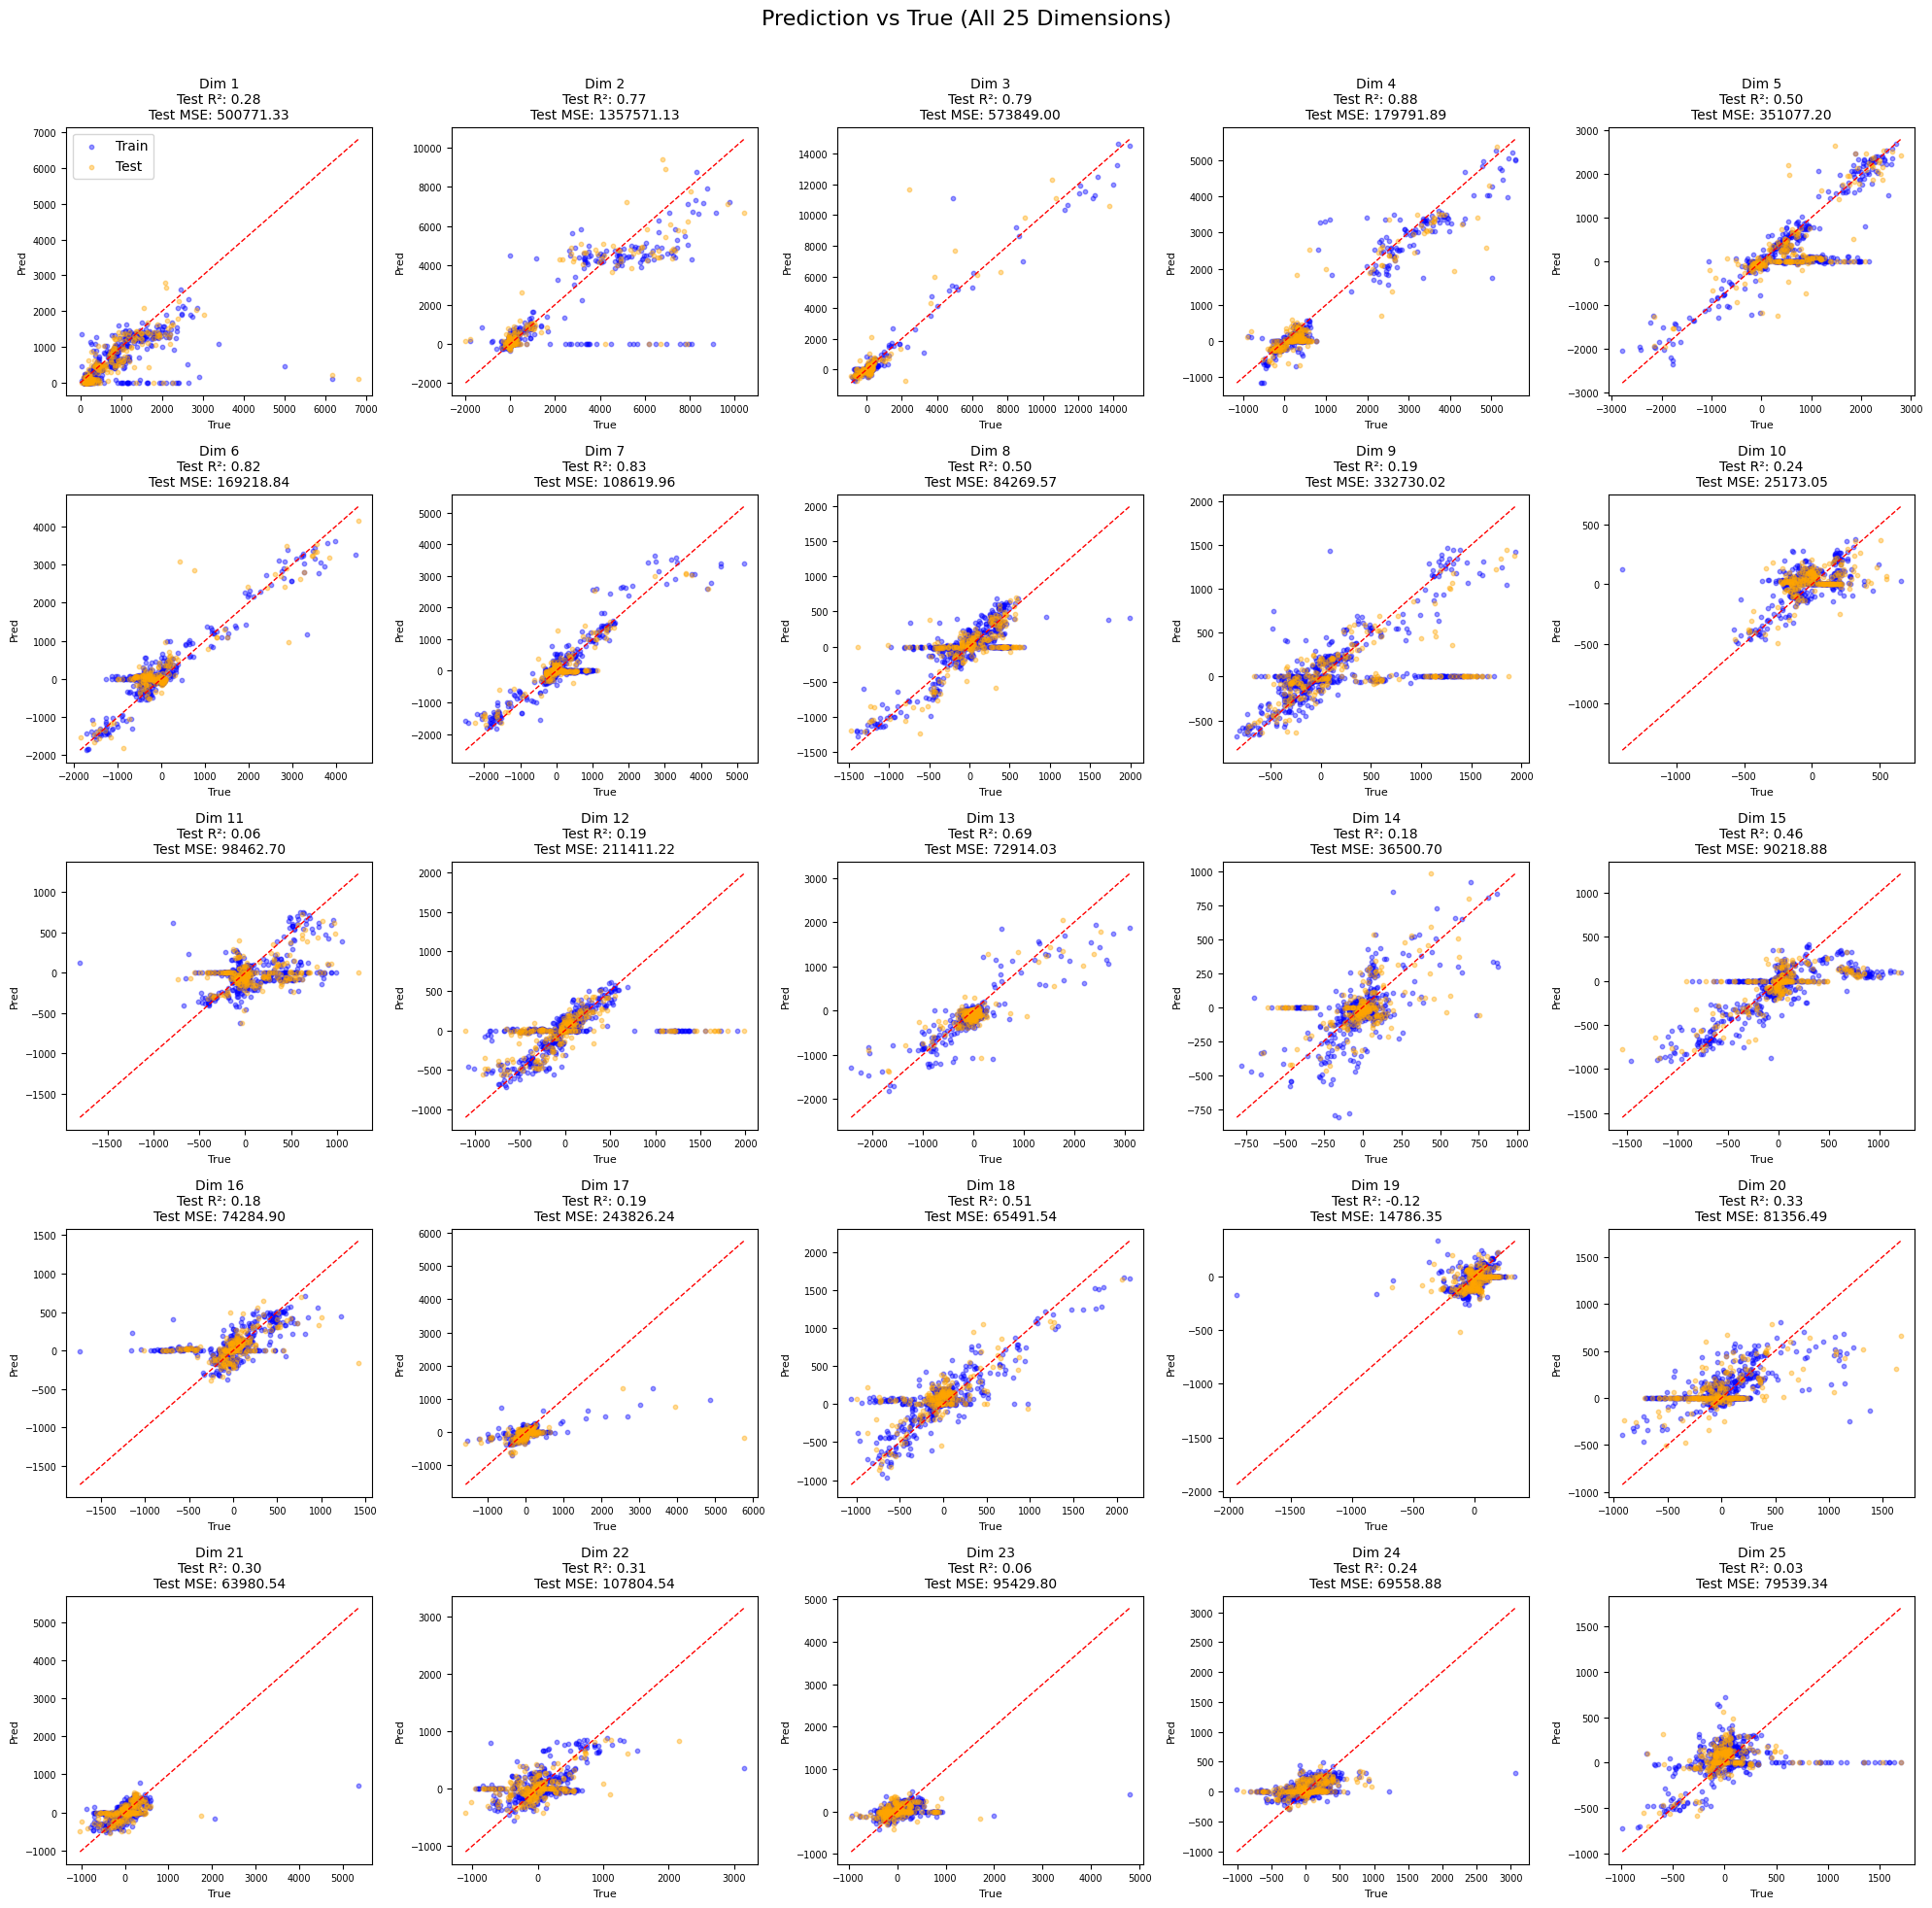

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 5x5 subplot
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))  #  크기 조정
axes = axes.flatten()

for i in range(25):
    ax = axes[i]

    # 개별 차원 데이터 추출
    true_train = y_train.iloc[:, i]
    pred_train = y_train_pred[:, i]

    true_test = y_test.iloc[:, i]
    pred_test = y_test_pred[:, i]

    # scatter plot
    ax.scatter(true_train, pred_train, color='blue', alpha=0.4, label='Train', s=10)
    ax.scatter(true_test, pred_test, color='orange', alpha=0.4, label='Test', s=10)

    # 대각선 이상적 예측선
    min_val = min(true_train.min(), pred_test.min(), true_test.min(), pred_train.min())
    max_val = max(true_train.max(), pred_test.max(), true_test.max(), pred_train.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1)

    # 타이틀 및 메트릭
    mse = np.mean((true_test - pred_test) ** 2)
    r2 = 1 - np.sum((true_test - pred_test) ** 2) / np.sum((true_test - np.mean(true_test)) ** 2)
    ax.set_title(f"Dim {i+1}\nTest R²: {r2:.2f}\nTest MSE: {mse:.2f}", fontsize=10)

    ax.set_xlabel("True", fontsize=8)
    ax.set_ylabel("Pred", fontsize=8)
    ax.tick_params(labelsize=7)

# 범례 하나만 (좌상단 subplot)
axes[0].legend(fontsize=10, loc='best')

# 전체 제목
plt.suptitle("Prediction vs True (All 25 Dimensions)", fontsize=16)

# 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [165]:
X_combined_df

,Volume of aeration tanks (m3),Actual Inf rate (m3/d),℃ Temp.Max.SamplingDate,℃ Temp.Avg.SamplingDate,℃ Temp.Min.SamplingDate,℃ Dew.Max.SamplingDate,℃ Dew.Avg.SamplingDate,℃ Dew.Min.SamplingDate,℃ Humidity.Max.SamplingDate,℃ Humidity.Min.SamplingDate,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
0,9642.0,46600.0,3.89,0.00,-3.33,21,11,-2,74,22,...,317.051302,-107.129808,157.402247,-43.386368,205.059007,-109.652022,113.213108,-201.600294,295.246622,49.916137
1,9642.0,46600.0,6.67,0.00,-6.11,9,6,3,54,19,...,357.989381,-114.635319,143.832754,-54.885662,230.474448,-121.564897,153.277615,-198.259944,262.437334,52.576113
2,9642.0,46600.0,5.00,0.00,-5.00,23,15,5,75,29,...,357.476862,-129.928063,160.825619,-43.535394,216.018449,-133.473281,163.458531,-187.295112,248.708429,59.054799
3,9642.0,46600.0,8.89,3.89,-1.11,30,21,12,75,33,...,386.954296,-126.885360,97.207702,-55.850495,264.337338,-173.612984,282.539729,-203.614000,276.573825,49.609553
4,9642.0,46600.0,5.00,0.00,-4.44,28,11,-6,100,14,...,456.104859,-147.219208,71.138638,-62.215277,309.750748,-247.679430,405.571888,-197.015934,217.469822,48.169274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,3800.0,7132.0,0.56,-1.11,-2.22,32,29,23,100,67,...,133.717696,-0.099122,-45.066537,77.874564,-172.233682,-23.596152,-87.079236,30.525165,34.836274,3.343323
791,3800.0,13080.0,3.33,1.11,-1.11,34,31,28,100,68,...,72.775052,61.545496,-144.816352,38.065391,-80.951101,-70.711340,1.462919,89.558499,-60.681735,78.185890
792,3800.0,9459.0,10.00,4.44,-0.56,41,36,31,100,62,...,105.205005,11.365890,-105.264552,40.491902,-104.518769,-12.286845,-41.277604,38.447368,15.859208,38.447044
793,3800.0,8087.0,7.22,3.33,-1.11,36,29,21,100,31,...,48.375391,42.507659,-151.507612,50.336191,-97.122063,-74.901177,2.571859,71.857578,-11.479346,35.150844


In [167]:
sample_name_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,


In [178]:
X_combined_df.iloc[:,2:]

,Volume of aeration tanks (m3),Actual Inf rate (m3/d),℃ Temp.Max.SamplingDate,℃ Temp.Avg.SamplingDate,℃ Temp.Min.SamplingDate,℃ Dew.Max.SamplingDate,℃ Dew.Avg.SamplingDate,℃ Dew.Min.SamplingDate,℃ Humidity.Max.SamplingDate,℃ Humidity.Min.SamplingDate,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
BJ143,9642.0,46600.0,3.89,0.00,-3.33,21,11,-2,74,22,...,317.051302,-107.129808,157.402247,-43.386368,205.059007,-109.652022,113.213108,-201.600294,295.246622,49.916137
BJ144,9642.0,46600.0,6.67,0.00,-6.11,9,6,3,54,19,...,357.989381,-114.635319,143.832754,-54.885662,230.474448,-121.564897,153.277615,-198.259944,262.437334,52.576113
BJ145,9642.0,46600.0,5.00,0.00,-5.00,23,15,5,75,29,...,357.476862,-129.928063,160.825619,-43.535394,216.018449,-133.473281,163.458531,-187.295112,248.708429,59.054799
BJ146,9642.0,46600.0,8.89,3.89,-1.11,30,21,12,75,33,...,386.954296,-126.885360,97.207702,-55.850495,264.337338,-173.612984,282.539729,-203.614000,276.573825,49.609553
BJ147,9642.0,46600.0,5.00,0.00,-4.44,28,11,-6,100,14,...,456.104859,-147.219208,71.138638,-62.215277,309.750748,-247.679430,405.571888,-197.015934,217.469822,48.169274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE48A,3800.0,7132.0,0.56,-1.11,-2.22,32,29,23,100,67,...,133.717696,-0.099122,-45.066537,77.874564,-172.233682,-23.596152,-87.079236,30.525165,34.836274,3.343323
SE49A,3800.0,13080.0,3.33,1.11,-1.11,34,31,28,100,68,...,72.775052,61.545496,-144.816352,38.065391,-80.951101,-70.711340,1.462919,89.558499,-60.681735,78.185890
SE50A,3800.0,9459.0,10.00,4.44,-0.56,41,36,31,100,62,...,105.205005,11.365890,-105.264552,40.491902,-104.518769,-12.286845,-41.277604,38.447368,15.859208,38.447044
SE51A,3800.0,8087.0,7.22,3.33,-1.11,36,29,21,100,31,...,48.375391,42.507659,-151.507612,50.336191,-97.122063,-74.901177,2.571859,71.857578,-11.479346,35.150844


In [182]:
y_pred_df

,SVD_1,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,SVD_9,SVD_10,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
BJ143,173.809540,332.313477,201.788513,457.266052,386.441040,-79.601089,259.509003,582.344666,1346.500244,245.053131,...,441.621033,-113.205643,7.836396,-182.829132,208.027969,-68.267982,682.951172,-209.311417,104.495674,186.415131
BJ144,170.475220,304.831146,210.583054,392.486877,459.748199,-91.855652,218.617874,576.456543,1347.420288,250.210373,...,438.007660,-103.885536,53.631451,-184.867722,205.923950,-56.749199,692.823120,-213.377762,121.208488,202.338898
BJ145,188.680939,464.323944,248.605270,566.772522,402.717468,-82.274330,545.650085,589.529785,1469.916382,285.181793,...,493.530670,-138.080856,62.130390,-210.534042,287.517914,-113.687035,811.829773,-202.286819,97.496155,284.327850
BJ146,149.965912,394.015961,196.111069,540.172485,285.109680,-104.905502,496.555359,626.323425,1449.104126,266.543396,...,476.339844,-85.393204,-21.318710,-179.437164,268.528900,-134.690781,770.389282,-213.919739,51.018196,247.865051
BJ147,157.600723,340.845093,203.893311,557.918213,339.092743,-81.022385,525.563721,602.477661,1438.825928,262.076782,...,446.550476,-106.493317,28.879244,-194.689392,264.701660,-117.300308,775.948914,-181.777084,63.295300,252.688232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE48A,331.400513,539.249084,5458.650879,-216.803711,304.694794,-156.228851,338.837402,-37.489098,-170.639267,12.838505,...,118.401604,7.230058,-29.592794,-12.905546,-48.818275,-13.321739,119.011002,24.522547,32.718121,13.542791
SE49A,336.856537,529.226440,5174.046875,-168.805191,152.424377,113.779114,135.871017,-146.520935,-183.074295,81.316292,...,-7.752136,50.507488,147.292923,-84.036667,-119.945168,-22.738443,130.406143,-68.569260,48.805328,176.263367
SE50A,373.179962,563.209900,5128.165527,-200.473892,401.642517,-154.777435,315.703888,-83.000313,-243.369202,6.016378,...,130.337234,18.724455,2.410768,-13.092165,-78.400955,1.697938,139.813690,44.469265,35.647591,40.255898
SE51A,326.179871,356.253784,4733.224609,-172.435608,561.675171,-217.585587,394.489197,-76.043961,-264.975189,-44.229603,...,122.916893,49.497707,-61.445602,22.101854,-66.890511,-12.318073,162.512695,71.086235,9.023742,-21.512781


In [183]:
svd_cols

['SVD_1',
 'SVD_2',
 'SVD_3',
 'SVD_4',
 'SVD_5',
 'SVD_6',
 'SVD_7',
 'SVD_8',
 'SVD_9',
 'SVD_10',
 'SVD_11',
 'SVD_12',
 'SVD_13',
 'SVD_14',
 'SVD_15',
 'SVD_16',
 'SVD_17',
 'SVD_18',
 'SVD_19',
 'SVD_20',
 'SVD_21',
 'SVD_22',
 'SVD_23',
 'SVD_24',
 'SVD_25']

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


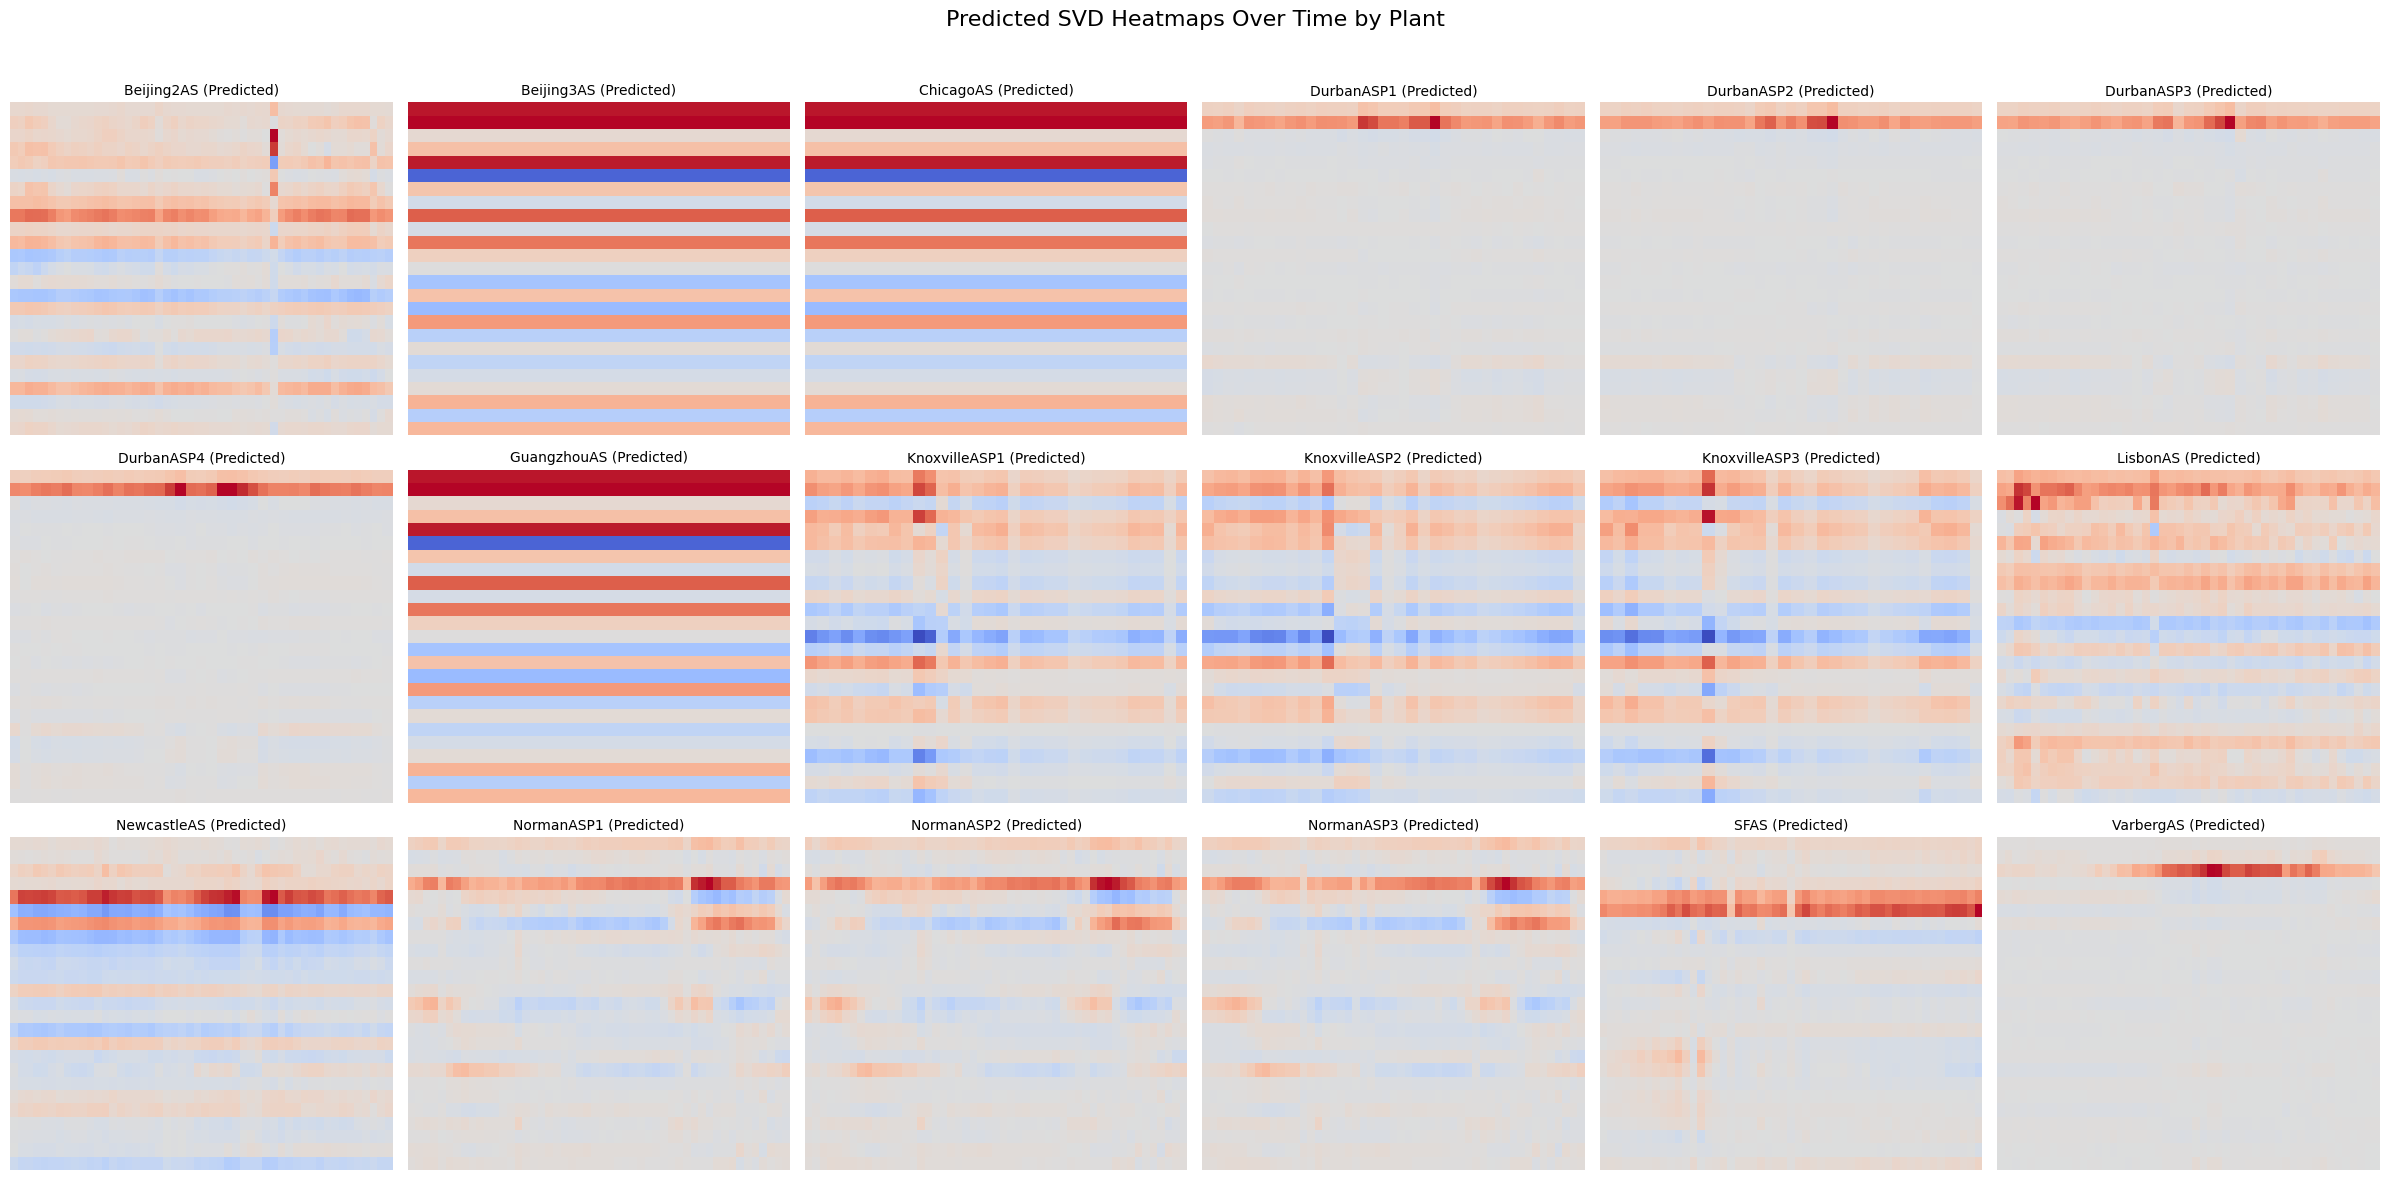

In [180]:
# 모델 예측 결과도 같은 index로
X_combined_df_vi = X_combined_df.apply(pd.to_numeric, errors='coerce')
X_combined_df_vi = X_combined_df_vi.fillna(X_combined_df_vi.mean(numeric_only=True))

y_pred = model.predict(X_combined_df_vi.iloc[:,2:])

y_pred_df = pd.DataFrame(y_pred, index=sample_name_list, columns=y_combined_df.columns)

# 👉 예측값 DataFrame이 있고 index는 샘플명이어야 함 (ex: UK01A, SF01ML 등)
# y_pred_df: index = Sample, columns = SVD_1 ~ SVD_25

# Position & Date 붙이기
meta_info = merged_df[["Position", "Date"]].copy()
meta_info = meta_info.loc[y_pred_df.index]  # 인덱스 정렬 맞추기

# 예측값 + 메타정보 합치기
pred_vis_df = pd.concat([meta_info, y_pred_df], axis=1)

# 상위 18개 공정만 시각화
plant_list = pred_vis_df["Position"].unique()[:18]
svd_cols = [col for col in y_pred_df.columns if col.startswith("SVD_")]

# 서브플롯 설정
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(24, 12))
axes = axes.flatten()

for i, plant_name in enumerate(plant_list):
    ax = axes[i]

    group_df = pred_vis_df[pred_vis_df["Position"] == plant_name].sort_values("Date")
    
    if group_df.shape[0] < 3:
        ax.set_visible(False)
        continue

    group_df = group_df.set_index("Date")
    svd_data = group_df[svd_cols].T

    sns.heatmap(svd_data, cmap="coolwarm", center=0, ax=ax,
                cbar=False, xticklabels=False, yticklabels=False)

    ax.set_title(f"{plant_name} (Predicted)", fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("")

# 전체 타이틀 및 레이아웃 조정
plt.suptitle("Predicted SVD Heatmaps Over Time by Plant", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


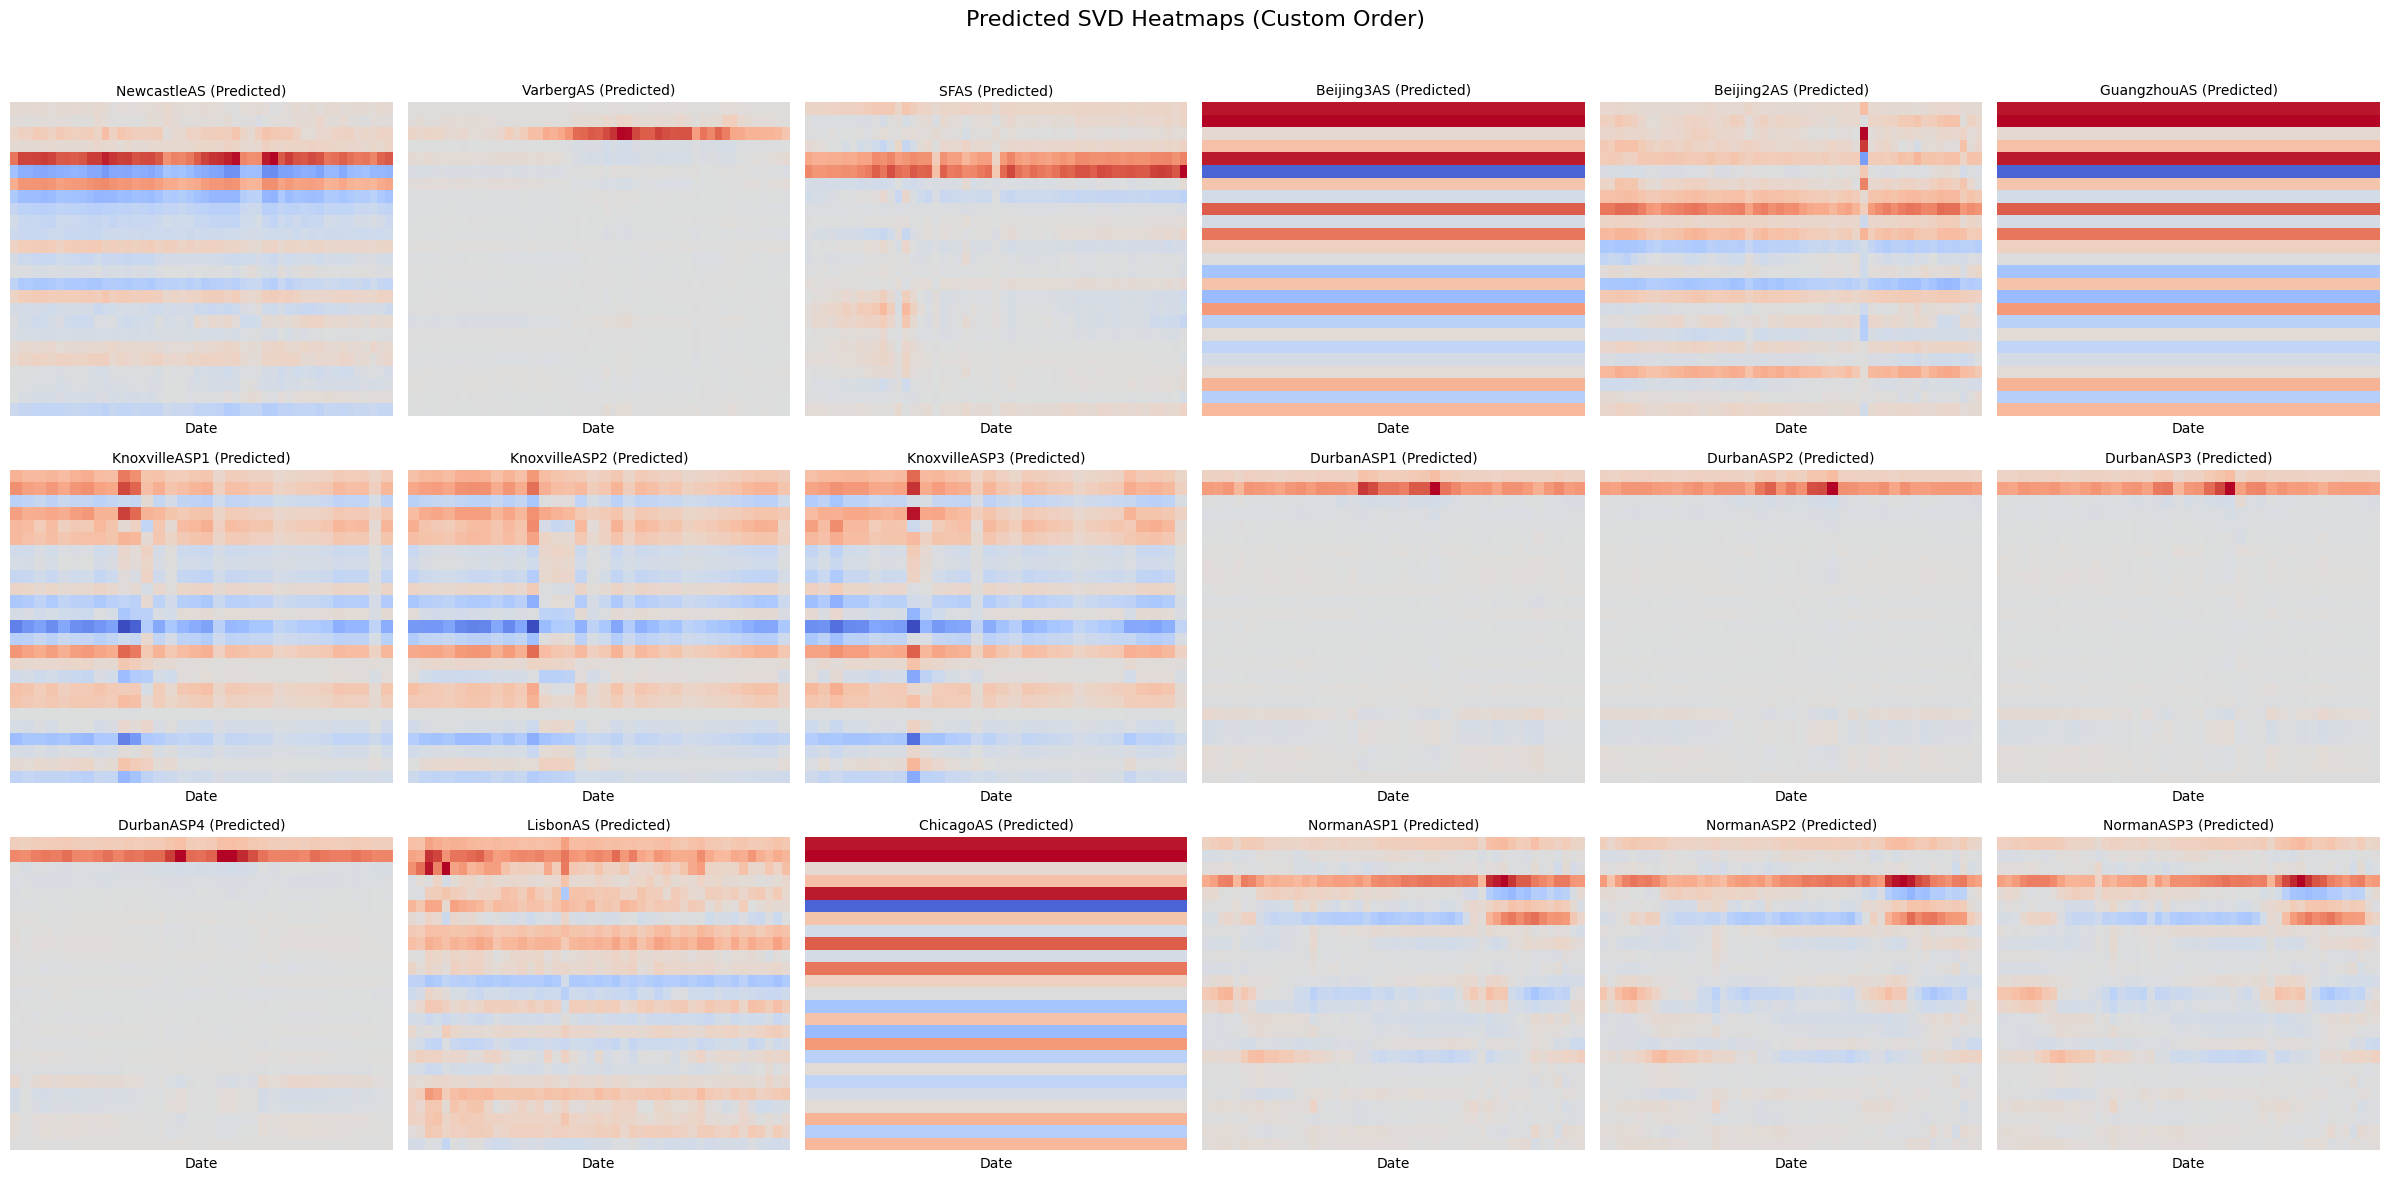

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 네가 지정한 순서
as_list = [
    'NewcastleAS', 'VarbergAS', 'SFAS',
    'Beijing3AS', 'Beijing2AS', 'GuangzhouAS',
    'KnoxvilleASP1', 'KnoxvilleASP2', 'KnoxvilleASP3',
    'DurbanASP1', 'DurbanASP2', 'DurbanASP3', 'DurbanASP4',
    'LisbonAS', 'ChicagoAS',
    'NormanASP1', 'NormanASP2', 'NormanASP3'
]

# 🔹 예측값 + 메타 정보
meta_info = merged_df.loc[y_pred_df.index, ["Position", "Date"]]
pred_vis_df = pd.concat([meta_info, y_pred_df], axis=1)

# 🔹 SVD 컬럼
svd_cols = [col for col in y_pred_df.columns if col.startswith("SVD_")]

# 🔹 서브플롯 설정 (행 × 열 자동 계산)
n = len(as_list)
ncols = 6
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, nrows * 4))
axes = axes.flatten()

for i, plant_name in enumerate(as_list):
    ax = axes[i]

    group_df = pred_vis_df[pred_vis_df["Position"] == plant_name].sort_values("Date")

    if group_df.shape[0] < 3:
        ax.set_visible(False)
        continue

    group_df = group_df.set_index("Date")
    svd_data = group_df[svd_cols].T

    sns.heatmap(svd_data, cmap="coolwarm", center=0, ax=ax,
                cbar=False, xticklabels=False, yticklabels=False)

    ax.set_title(f"{plant_name} (Predicted)", fontsize=10)

# 🔹 남는 subplot 감추기
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# 🔹 전체 타이틀 및 레이아웃
plt.suptitle("Predicted SVD Heatmaps (Custom Order)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
